In [ ]:
#Part 1: Donut Chart Using Plotly Graph Objects

In [102]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import folium
from plotly.subplots import make_subplots

In [3]:
pop_21 = pd.read_csv("Data/Canada Population 2021 Data.csv")
pop_21

Location  Non_Indigenous  First_Nations  Inuit   Métis
0                      Canada        34124000        1426950  82010  560335
1   Newfoundland and Labrador          443310          40415  10245    6715
2        Prince Edward Island          144930           3755    255     915
3                 Nova Scotia          890045          40715   1860   18310
4               New Brunswick          712025          31850   1025    9445
5                      Quebec        13511270         288525  18025   44275
6                     Ontario        13511270         332555   6290  131775
7                    Manitoba         1067780         140250   1150   88300
8                Saskatchewan          912150         129225    715   56055
9                     Alberta         3854700         188315   4235  115455
10           British Columbia         4604060         209320   2340   85205
11                      Yukon           34835           7405    335    1235
12      Northwest Territories           20280          14005   4680    2525
13                    Nunavut            5250            610  30855     125

In [4]:
pop_long = pd.melt(pop_21, id_vars=["Location"], value_vars=["First_Nations", "Inuit", "Métis", "Non_Indigenous"],
    var_name="Population_Group", value_name="Count")
pop_long

Location Population_Group     Count
0                      Canada    First_Nations   1426950
1   Newfoundland and Labrador    First_Nations     40415
2        Prince Edward Island    First_Nations      3755
3                 Nova Scotia    First_Nations     40715
4               New Brunswick    First_Nations     31850
5                      Quebec    First_Nations    288525
6                     Ontario    First_Nations    332555
7                    Manitoba    First_Nations    140250
8                Saskatchewan    First_Nations    129225
9                     Alberta    First_Nations    188315
10           British Columbia    First_Nations    209320
11                      Yukon    First_Nations      7405
12      Northwest Territories    First_Nations     14005
13                    Nunavut    First_Nations       610
14                     Canada            Inuit     82010
15  Newfoundland and Labrador            Inuit     10245
16       Prince Edward Island            Inuit       255
17                Nova Scotia            Inuit      1860
18              New Brunswick            Inuit      1025
19                     Quebec            Inuit     18025
20                    Ontario            Inuit      6290
21                   Manitoba            Inuit      1150
22               Saskatchewan            Inuit       715
23                    Alberta            Inuit      4235
24           British Columbia            Inuit      2340
25                      Yukon            Inuit       335
26      Northwest Territories            Inuit      4680
27                    Nunavut            Inuit     30855
28                     Canada            Métis    560335
29  Newfoundland and Labrador            Métis      6715
30       Prince Edward Island            Métis       915
31                Nova Scotia            Métis     18310
32              New Brunswick            Métis      9445
33                     Quebec            Métis     44275
34                    Ontario            Métis    131775
35                   Manitoba            Métis     88300
36               Saskatchewan            Métis     56055
37                    Alberta            Métis    115455
38           British Columbia            Métis     85205
39                      Yukon            Métis      1235
40      Northwest Territories            Métis      2525
41                    Nunavut            Métis       125
42                     Canada   Non_Indigenous  34124000
43  Newfoundland and Labrador   Non_Indigenous    443310
44       Prince Edward Island   Non_Indigenous    144930
45                Nova Scotia   Non_Indigenous    890045
46              New Brunswick   Non_Indigenous    712025
47                     Quebec   Non_Indigenous  13511270
48                    Ontario   Non_Indigenous  13511270
49                   Manitoba   Non_Indigenous   1067780
50               Saskatchewan   Non_Indigenous    912150
51                    Alberta   Non_Indigenous   3854700
52           British Columbia   Non_Indigenous   4604060
53                      Yukon   Non_Indigenous     34835
54      Northwest Territories   Non_Indigenous     20280
55                    Nunavut   Non_Indigenous      5250

In [5]:
canada = pop_long[pop_long["Location"] == "Canada"]
canada

Location Population_Group     Count
0    Canada    First_Nations   1426950
14   Canada            Inuit     82010
28   Canada            Métis    560335
42   Canada   Non_Indigenous  34124000

In [6]:
canada["Population_Group"] = canada["Population_Group"].str.replace("_", " ")
canada

Location Population_Group     Count
0    Canada    First Nations   1426950
14   Canada            Inuit     82010
28   Canada            Métis    560335
42   Canada   Non Indigenous  34124000

In [90]:
labels = canada["Population_Group"]
values = canada["Count"]
colors = ["indigo", "blue", "lightblue", "gray"] # Color order is First Nations, Inuit, Metis, Non Indigenous
labels

0      First Nations
14             Inuit
28             Métis
42    Non Indigenous
Name: Population_Group, dtype: object

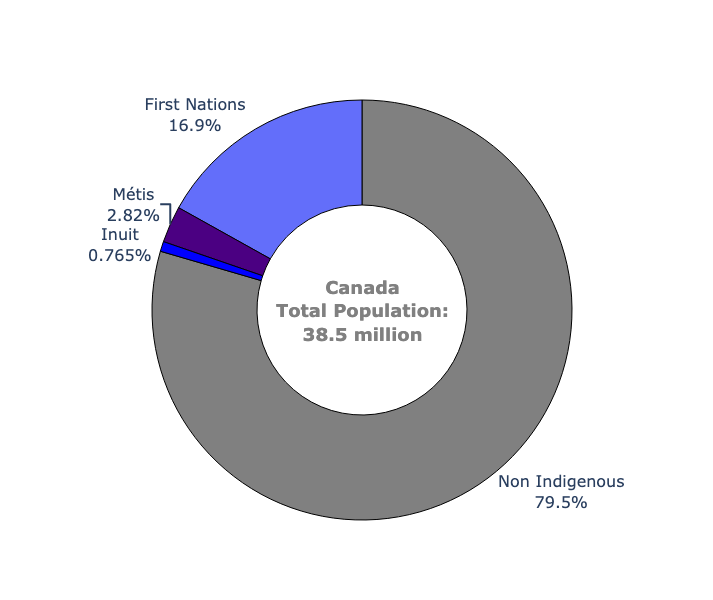

In [114]:
fig = go.Figure(go.Pie(labels=labels, values=values, hole=0.5, marker_colors=colors))

fig.update_layout(
    annotations=[
        dict(
            text='<span style="font-weight:bold;color:grey">'
                 'Canada<br>Total Population:<br>38.5 million</span>',
            x=0.5, y=0.5,
            font_size=18,
            showarrow=False
        )
    ],
    height=600,
    width=600,
    showlegend=False
)

fig.update_traces(
    textposition='outside',
    textinfo='label+percent',
    textfont_size=16,
    hovertemplate=(
        '<span style="font-family:Georgia;font-weight:bold;font-size:16px;">'
        '%{label}<br><br>Population: %{value:,}'
        '</span><extra></extra>'
    ),
    hoverlabel={'bgcolor': 'lightgray'},
    marker={'line': {'color': 'black', 'width': 1}}
)

fig.write_image("donut.png")       
fig.write_html("donut.html")       
fig.show()

In [103]:
#PART 2
pop_21 = pd.read_csv("Data/Canada Population 2021 Data.csv")
pop_21

Location  Non_Indigenous  First_Nations  Inuit   Métis
0                      Canada        34124000        1426950  82010  560335
1   Newfoundland and Labrador          443310          40415  10245    6715
2        Prince Edward Island          144930           3755    255     915
3                 Nova Scotia          890045          40715   1860   18310
4               New Brunswick          712025          31850   1025    9445
5                      Quebec        13511270         288525  18025   44275
6                     Ontario        13511270         332555   6290  131775
7                    Manitoba         1067780         140250   1150   88300
8                Saskatchewan          912150         129225    715   56055
9                     Alberta         3854700         188315   4235  115455
10           British Columbia         4604060         209320   2340   85205
11                      Yukon           34835           7405    335    1235
12      Northwest Territories           20280          14005   4680    2525
13                    Nunavut            5250            610  30855     125

In [104]:
reg_pop_21 = pop_21[pop_21["Location"] != "Canada"]
reg_pop_21

Location  Non_Indigenous  First_Nations  Inuit   Métis
1   Newfoundland and Labrador          443310          40415  10245    6715
2        Prince Edward Island          144930           3755    255     915
3                 Nova Scotia          890045          40715   1860   18310
4               New Brunswick          712025          31850   1025    9445
5                      Quebec        13511270         288525  18025   44275
6                     Ontario        13511270         332555   6290  131775
7                    Manitoba         1067780         140250   1150   88300
8                Saskatchewan          912150         129225    715   56055
9                     Alberta         3854700         188315   4235  115455
10           British Columbia         4604060         209320   2340   85205
11                      Yukon           34835           7405    335    1235
12      Northwest Territories           20280          14005   4680    2525
13                    Nunavut            5250            610  30855     125

In [105]:
# Correct names (you probably won't know what yet, but you'll come back and do this)
reg_pop_21["Location"] = reg_pop_21["Location"].replace({"Yukon": "Yukon Territory"}) # I did that because the geojson file has the name Yukon Territory but the pop_21 df has Yukon

# Calculate the new variable(s) you need
reg_pop_21["Total_Pop"] = (
    reg_pop_21["First_Nations"] + reg_pop_21["Inuit"] + reg_pop_21["Métis"] + reg_pop_21["Non_Indigenous"]
)
reg_pop_21["pct_indigenous"] = (
    (reg_pop_21["First_Nations"] + reg_pop_21["Inuit"] + reg_pop_21["Métis"])
    / reg_pop_21["Total_Pop"]
    * 100
)
reg_pop_21["pct_label"] = reg_pop_21["pct_indigenous"].round(0).astype(int).astype(str) + "%"
reg_pop_21

/var/folders/td/4b6sxd4n1l760kr55n8zq0jr0000gn/T/ipykernel_61274/2485030407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/td/4b6sxd4n1l760kr55n8zq0jr0000gn/T/ipykernel_61274/2485030407.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/td/4b6sxd4n1l760kr55n8zq0jr0000gn/T/ipykernel_61274/2485030407.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Location  Non_Indigenous  First_Nations  Inuit   Métis  \
1   Newfoundland and Labrador          443310          40415  10245    6715   
2        Prince Edward Island          144930           3755    255     915   
3                 Nova Scotia          890045          40715   1860   18310   
4               New Brunswick          712025          31850   1025    9445   
5                      Quebec        13511270         288525  18025   44275   
6                     Ontario        13511270         332555   6290  131775   
7                    Manitoba         1067780         140250   1150   88300   
8                Saskatchewan          912150         129225    715   56055   
9                     Alberta         3854700         188315   4235  115455   
10           British Columbia         4604060         209320   2340   85205   
11            Yukon Territory           34835           7405    335    1235   
12      Northwest Territories           20280          14005   4680    2525   
13                    Nunavut            5250            610  30855     125   

    Total_Pop  pct_indigenous pct_label  
1      500685       11.459301       11%  
2      149855        3.286510        3%  
3      950930        6.402679        6%  
4      754345        5.610165        6%  
5    13862095        2.530822        3%  
6    13981890        3.365925        3%  
7     1297480       17.703548       18%  
8     1098145       16.937199       17%  
9     4162705        7.399155        7%  
10    4900925        6.057326        6%  
11      43810       20.486190       20%  
12      41490       51.120752       51%  
13      36840       85.749186       86%

In [106]:
# Here is where you read in the geojson as a df and merge it with your data frame
# You may need to go back and correct names (do this for the data, not the json) and do this again
geojson = gpd.read_file("Data/Canada Provinces Data.json")
geojson

name  cartodb_id                created_at  \
0                      Quebec           1 2014-10-16 13:22:00+00:00   
1   Newfoundland and Labrador           5 2014-10-16 13:22:00+00:00   
2            British Columbia           6 2014-10-16 13:22:00+00:00   
3                     Nunavut          12 2014-10-16 13:22:00+00:00   
4       Northwest Territories          13 2014-10-16 13:22:00+00:00   
5               New Brunswick           7 2014-10-16 13:22:00+00:00   
6                 Nova Scotia           2 2014-10-16 13:22:00+00:00   
7                Saskatchewan           3 2014-10-16 13:22:00+00:00   
8                     Alberta           4 2014-10-16 13:22:00+00:00   
9        Prince Edward Island           8 2014-10-16 13:22:00+00:00   
10            Yukon Territory           9 2014-10-16 13:22:00+00:00   
11                   Manitoba          10 2014-10-16 13:22:00+00:00   
12                    Ontario          11 2014-10-16 13:22:00+00:00   

                  updated_at  \
0  2014-10-16 13:22:00+00:00   
1  2014-10-16 13:22:00+00:00   
2  2014-10-16 13:22:00+00:00   
3  2014-10-16 13:22:00+00:00   
4  2014-10-16 13:22:00+00:00   
5  2014-10-16 13:22:00+00:00   
6  2014-10-16 13:22:00+00:00   
7  2014-10-16 13:22:00+00:00   
8  2014-10-16 13:22:00+00:00   
9  2014-10-16 13:22:00+00:00   
10 2014-10-16 13:22:00+00:00   
11 2014-10-16 13:22:00+00:00   
12 2014-10-16 13:22:00+00:00   

                                             geometry  
0   MULTIPOLYGON (((-78.01917 62.59193, -77.86722 ...  
1   MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ...  
2   MULTIPOLYGON (((-131.0771 52.15009, -130.9481 ...  
3   MULTIPOLYGON (((-109.97841 78.67106, -109.4053...  
4   MULTIPOLYGON (((-110.3944 78.75221, -109.97841...  
5   MULTIPOLYGON (((-64.48277 47.91777, -64.51472 ...  
6   MULTIPOLYGON (((-60.91028 45.5461, -61.00028 4...  
7   MULTIPOLYGON (((-102.0017 59.99992, -102.0009 ...  
8   MULTIPOLYGON (((-114.0603 49, -114.0353 49.031...  
9   MULTIPOLYGON (((-63.98917 46.39361, -64.13501 ...  
10  MULTIPOLYGON (((-139.12109 69.52916, -139.2522...  
11  MULTIPOLYGON (((-102.0017 59.99992, -100.039 5...  
12  MULTIPOLYGON (((-79.5471 51.46013, -79.53944 5...

In [107]:
reg_pop_21

Location  Non_Indigenous  First_Nations  Inuit   Métis  \
1   Newfoundland and Labrador          443310          40415  10245    6715   
2        Prince Edward Island          144930           3755    255     915   
3                 Nova Scotia          890045          40715   1860   18310   
4               New Brunswick          712025          31850   1025    9445   
5                      Quebec        13511270         288525  18025   44275   
6                     Ontario        13511270         332555   6290  131775   
7                    Manitoba         1067780         140250   1150   88300   
8                Saskatchewan          912150         129225    715   56055   
9                     Alberta         3854700         188315   4235  115455   
10           British Columbia         4604060         209320   2340   85205   
11            Yukon Territory           34835           7405    335    1235   
12      Northwest Territories           20280          14005   4680    2525   
13                    Nunavut            5250            610  30855     125   

    Total_Pop  pct_indigenous pct_label  
1      500685       11.459301       11%  
2      149855        3.286510        3%  
3      950930        6.402679        6%  
4      754345        5.610165        6%  
5    13862095        2.530822        3%  
6    13981890        3.365925        3%  
7     1297480       17.703548       18%  
8     1098145       16.937199       17%  
9     4162705        7.399155        7%  
10    4900925        6.057326        6%  
11      43810       20.486190       20%  
12      41490       51.120752       51%  
13      36840       85.749186       86%

In [108]:
geojson = geojson[['name','geometry']]
geojson.columns = ['Location','geometry']

In [109]:
total = geojson.merge(reg_pop_21, left_on = 'Location', right_on = 'Location')
total = total[~total['geometry'].isna()] #I left this in b/c you will need it for the assignment
total

Location  \
0                      Quebec   
1   Newfoundland and Labrador   
2            British Columbia   
3                     Nunavut   
4       Northwest Territories   
5               New Brunswick   
6                 Nova Scotia   
7                Saskatchewan   
8                     Alberta   
9        Prince Edward Island   
10            Yukon Territory   
11                   Manitoba   
12                    Ontario   

                                             geometry  Non_Indigenous  \
0   MULTIPOLYGON (((-78.01917 62.59193, -77.86722 ...        13511270   
1   MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ...          443310   
2   MULTIPOLYGON (((-131.0771 52.15009, -130.9481 ...         4604060   
3   MULTIPOLYGON (((-109.97841 78.67106, -109.4053...            5250   
4   MULTIPOLYGON (((-110.3944 78.75221, -109.97841...           20280   
5   MULTIPOLYGON (((-64.48277 47.91777, -64.51472 ...          712025   
6   MULTIPOLYGON (((-60.91028 45.5461, -61.00028 4...          890045   
7   MULTIPOLYGON (((-102.0017 59.99992, -102.0009 ...          912150   
8   MULTIPOLYGON (((-114.0603 49, -114.0353 49.031...         3854700   
9   MULTIPOLYGON (((-63.98917 46.39361, -64.13501 ...          144930   
10  MULTIPOLYGON (((-139.12109 69.52916, -139.2522...           34835   
11  MULTIPOLYGON (((-102.0017 59.99992, -100.039 5...         1067780   
12  MULTIPOLYGON (((-79.5471 51.46013, -79.53944 5...        13511270   

    First_Nations  Inuit   Métis  Total_Pop  pct_indigenous pct_label  
0          288525  18025   44275   13862095        2.530822        3%  
1           40415  10245    6715     500685       11.459301       11%  
2          209320   2340   85205    4900925        6.057326        6%  
3             610  30855     125      36840       85.749186       86%  
4           14005   4680    2525      41490       51.120752       51%  
5           31850   1025    9445     754345        5.610165        6%  
6           40715   1860   18310     950930        6.402679        6%  
7          129225    715   56055    1098145       16.937199       17%  
8          188315   4235  115455    4162705        7.399155        7%  
9            3755    255     915     149855        3.286510        3%  
10           7405    335    1235      43810       20.486190       20%  
11         140250   1150   88300    1297480       17.703548       18%  
12         332555   6290  131775   13981890        3.365925        3%

In [111]:
# Make the map
geo_data = "Data/Canada Provinces Data.json"

CANADA_CENTER = [70, -96]
m = folium.Map(location=CANADA_CENTER, zoom_start=2.5, tiles=None)

# Create 4 feature groups and add each to the map, you might call them, fg1, fg2, fg3, fg4
# The names should be the names you want to show up in your layercontrol
fg1 = folium.FeatureGroup(name="% Indigenous", overlay=False).add_to(m)
fg2 = folium.FeatureGroup(name="First Nations", overlay=False).add_to(m)
fg3 = folium.FeatureGroup(name="Inuit", overlay=False).add_to(m)
fg4 = folium.FeatureGroup(name="Métis", overlay=False).add_to(m)

# Make 4 choropleths, one for each feature group, add each one to the appropriate feature group
# Here is a model 
#folium.Choropleth(geo_data, name_of_your_merged_df, columns = ['appropriate col 1', 'appropriate col 2'],
#                 key_on='whatever_goes_here', bins = a_number).geojson.add_to(fg1)
# Do this for the other 3, if you are using the same column names for appropriate col 2 every time, you are
# doing it wrong, if you are NOT using the same column name for appropriate col 1, you are doing it wrong

folium.Choropleth(
    geo_data=geo_data,
    data=total,
    columns=["Location", "pct_indigenous"],
    key_on="feature.properties.name",
    fill_color="Purples",
    fill_opacity=0.8,
    line_opacity=0.6,
    bins=8,
).geojson.add_to(fg1)

folium.Choropleth(
    geo_data=geo_data,
    data=total,
    columns=["Location", "First_Nations"],
    key_on="feature.properties.name",
    fill_color="Purples",
    fill_opacity=0.8,
    line_opacity=0.6,
    bins=8,
).geojson.add_to(fg2)

folium.Choropleth(
    geo_data=geo_data,
    data=total,
    columns=["Location", "Inuit"],
    key_on="feature.properties.name",
    fill_color="Purples",
    fill_opacity=0.8,
    line_opacity=0.6,
    bins=8,
).geojson.add_to(fg3)

folium.Choropleth(
    geo_data=geo_data,
    data=total,
    columns=["Location", "Métis"],
    key_on="feature.properties.name",
    fill_color="Purples",
    fill_opacity=0.8,
    line_opacity=0.6,
    bins=8,
).geojson.add_to(fg4)

# Use the loop set up below to add the fancy tooltip by adding a geojson to each feature group
# - it will be the SAME GeoJson each time b/c we want the same tooltip every time
#for fg in [fg1, fg2, fg3, fg4]:
#    folium.features.GeoJson(
                    # Paste in the code from class and edit it to match the data you have now with appropriate names and data
#                    ).add_to(fg)   

for fg in [fg1, fg2, fg3, fg4]:
    folium.features.GeoJson(
        data=total,
        name="Tooltip",
        smooth_factor=2,
        style_function=lambda x: {"color": "black","fillColor": "transparent", "weight": 0.5,},
        tooltip=folium.features.GeoJsonTooltip(
            fields=["Location","pct_indigenous","First_Nations","Inuit", "Métis"],
            aliases=["Province/Territory:","Percent Indigenous Population","First Nations Population","Inuit Population", "Métis Population"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color:#F0EFEF;
                border:2px solid black;
                border-radius:3px;
                box-shadow:3px;
                font-size:medium;
            """,
            max_width=800,
        ),
        highlight_function=lambda x: {"weight": 3, "fillColor": "grey"},
    ).add_to(fg)


folium.LayerControl(collapsed=False).add_to(m)

title_html = ('<h3 align="center" style="font-size:20px;color:purple">'"Indigenous Populations in Canada (2021)</h3>")
m.get_root().html.add_child(folium.Element(title_html))

m.save("map.html")  
m 

In [29]:
#PART 3
merge_df = pd.read_csv("Data/Canada Merge Data.csv")
merge_df

Geography                     Domain         Sex  \
0    Newfoundland and Labrador  First Nations off reserve  Both sexes   
1    Newfoundland and Labrador                      Inuit  Both sexes   
2    Newfoundland and Labrador                      Métis  Both sexes   
3    Newfoundland and Labrador  NonIndigenous [reference]  Both sexes   
4    Newfoundland and Labrador  First Nations off reserve       Males   
..                         ...                        ...         ...   
155                    Nunavut  NonIndigenous [reference]       Males   
156                    Nunavut  First Nations off reserve     Females   
157                    Nunavut                      Inuit     Females   
158                    Nunavut                      Métis     Females   
159                    Nunavut  NonIndigenous [reference]     Females   

     NUM_HSC  DENOM_HSC  CR_HSC  NUM_MOOD  DENOM_MOOD  CR_MOOD  NUM_ANX  ...  \
0     5397.0    27878.0   19.36    3638.0       28830    12.62   4674.0  ...   
1        NaN     4187.0     NaN       NaN        4794      NaN      NaN  ...   
2        NaN     4949.0     NaN       NaN        5803      NaN      NaN  ...   
3    51198.0   365601.0   14.00   37109.0      382278     9.71  42965.0  ...   
4        NaN    12913.0     NaN    1417.0       13609    10.41   1605.0  ...   
..       ...        ...     ...       ...         ...      ...      ...  ...   
155      NaN     1882.0     NaN       NaN        1968      NaN      NaN  ...   
156      NaN       92.0     NaN       0.0          64      NaN      0.0  ...   
157   1464.0     9707.0   15.08    1076.0       10024    10.73   1056.0  ...   
158      0.0       45.0     NaN       0.0          46      NaN      0.0  ...   
159    450.0     1461.0   30.77       NaN        1369      NaN      NaN  ...   

     CR_PERC   NUM_ST  DENOM_ST      CR_ST  NUM_BELONG  DENOM_BELONG  \
0       8.42   2278.0   27714.0   8.219672     20981.0         27932   
1        NaN      NaN    4361.0        NaN      3640.0          4677   
2        NaN      NaN    4949.0        NaN      4348.0          5716   
3       5.90  31047.0  364338.0   8.521483    286585.0        367065   
4        NaN      NaN   12854.0        NaN      9424.0         13074   
..       ...      ...       ...        ...         ...           ...   
155      NaN    316.0    1882.0  16.790648      1520.0          1919   
156      NaN      NaN      92.0        NaN         NaN            64   
157    12.25   2398.0    9645.0  24.862623      8384.0          9658   
158      NaN      0.0      45.0   0.000000         NaN            46   
159      NaN      NaN    1461.0        NaN      1007.0          1369   

     CR_BELONG   NUM_FI  DENOM_FI  CR_FI  
0        75.12   1939.0   14354.0  13.51  
1        77.84      NaN    2496.0    NaN  
2        76.07      NaN    3329.0    NaN  
3        78.07  15574.0  192226.0   8.10  
4        72.08    827.0    6865.0  12.05  
..         ...      ...       ...    ...  
155      79.20      NaN    1936.0    NaN  
156        NaN      NaN      64.0    NaN  
157      86.81   5829.0    9424.0  61.85  
158        NaN      NaN      46.0    NaN  
159      73.57      NaN    1336.0    NaN  

[160 rows x 24 columns]

In [32]:
merge_df = merge_df[merge_df["Domain"] != "Missing"]

merge_df["Domain"] = merge_df["Domain"].replace({"NonIndigenous [reference]": "Non Indigenous"})
merge_df["Domain"] = merge_df["Domain"].replace({"First Nations off reserve": "First Nations"})
merge_df

/var/folders/td/4b6sxd4n1l760kr55n8zq0jr0000gn/T/ipykernel_61274/2477065582.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/td/4b6sxd4n1l760kr55n8zq0jr0000gn/T/ipykernel_61274/2477065582.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Geography          Domain         Sex  NUM_HSC  \
0    Newfoundland and Labrador   First Nations  Both sexes   5397.0   
1    Newfoundland and Labrador           Inuit  Both sexes      NaN   
2    Newfoundland and Labrador           Métis  Both sexes      NaN   
3    Newfoundland and Labrador  Non Indigenous  Both sexes  51198.0   
4    Newfoundland and Labrador   First Nations       Males      NaN   
..                         ...             ...         ...      ...   
155                    Nunavut  Non Indigenous       Males      NaN   
156                    Nunavut   First Nations     Females      NaN   
157                    Nunavut           Inuit     Females   1464.0   
158                    Nunavut           Métis     Females      0.0   
159                    Nunavut  Non Indigenous     Females    450.0   

     DENOM_HSC  CR_HSC  NUM_MOOD  DENOM_MOOD  CR_MOOD  NUM_ANX  ...  CR_PERC  \
0      27878.0   19.36    3638.0       28830    12.62   4674.0  ...     8.42   
1       4187.0     NaN       NaN        4794      NaN      NaN  ...      NaN   
2       4949.0     NaN       NaN        5803      NaN      NaN  ...      NaN   
3     365601.0   14.00   37109.0      382278     9.71  42965.0  ...     5.90   
4      12913.0     NaN    1417.0       13609    10.41   1605.0  ...      NaN   
..         ...     ...       ...         ...      ...      ...  ...      ...   
155     1882.0     NaN       NaN        1968      NaN      NaN  ...      NaN   
156       92.0     NaN       0.0          64      NaN      0.0  ...      NaN   
157     9707.0   15.08    1076.0       10024    10.73   1056.0  ...    12.25   
158       45.0     NaN       0.0          46      NaN      0.0  ...      NaN   
159     1461.0   30.77       NaN        1369      NaN      NaN  ...      NaN   

      NUM_ST  DENOM_ST      CR_ST  NUM_BELONG  DENOM_BELONG  CR_BELONG  \
0     2278.0   27714.0   8.219672     20981.0         27932      75.12   
1        NaN    4361.0        NaN      3640.0          4677      77.84   
2        NaN    4949.0        NaN      4348.0          5716      76.07   
3    31047.0  364338.0   8.521483    286585.0        367065      78.07   
4        NaN   12854.0        NaN      9424.0         13074      72.08   
..       ...       ...        ...         ...           ...        ...   
155    316.0    1882.0  16.790648      1520.0          1919      79.20   
156      NaN      92.0        NaN         NaN            64        NaN   
157   2398.0    9645.0  24.862623      8384.0          9658      86.81   
158      0.0      45.0   0.000000         NaN            46        NaN   
159      NaN    1461.0        NaN      1007.0          1369      73.57   

      NUM_FI  DENOM_FI  CR_FI  
0     1939.0   14354.0  13.51  
1        NaN    2496.0    NaN  
2        NaN    3329.0    NaN  
3    15574.0  192226.0   8.10  
4      827.0    6865.0  12.05  
..       ...       ...    ...  
155      NaN    1936.0    NaN  
156      NaN      64.0    NaN  
157   5829.0    9424.0  61.85  
158      NaN      46.0    NaN  
159      NaN    1336.0    NaN  

[155 rows x 24 columns]

In [35]:
max_x = merge_df["CR_PERC"].max() * 1.05
max_y = merge_df["CR_FI"].max() * 1.05
min_x, min_y = 0, 0

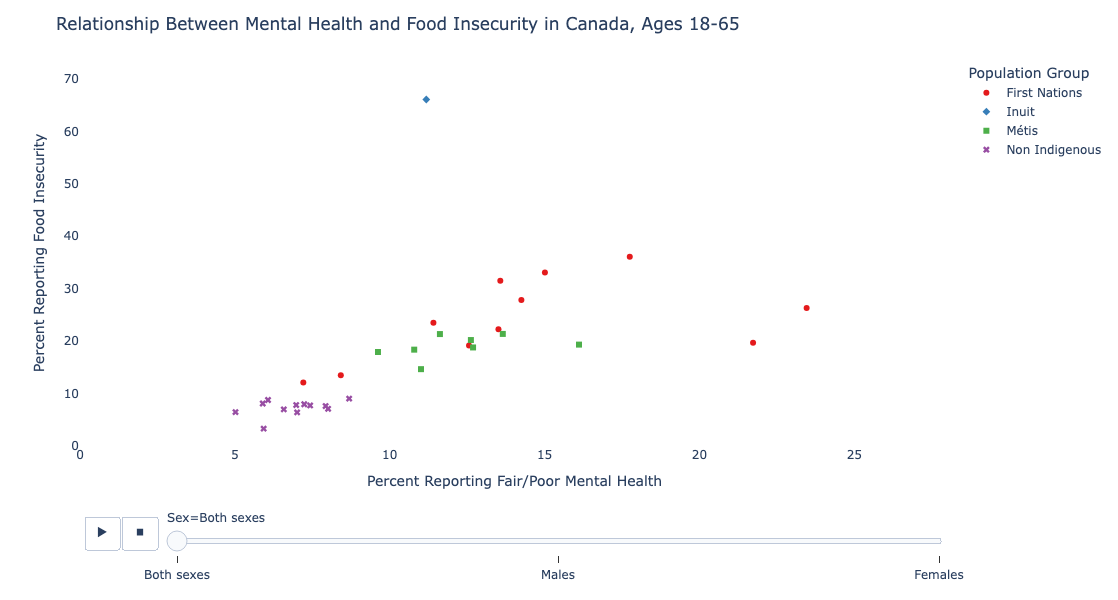

In [56]:
fig = px.scatter(
    merge_df,
    x="CR_PERC",
    y="CR_FI",
    color="Domain",
    symbol="Domain",
    animation_frame="Sex",
    hover_name="Geography",
    labels={"CR_PERC": "Percent Reporting Fair/Poor Mental Health",
        "CR_FI": "Percent Reporting Food Insecurity",
        "Domain": "Population Group",
        "DENOM_PERC": "Sample Size of Reporting Fair/Poor Mental Health",
        "DENOM_FI": "Sample Size of Food Insecutiry",
        "Sex": "Sex"},
    hover_data={"CR_PERC": ":.0f",
        "CR_FI": ":.0f",       
        "DENOM_PERC": True,     
        "DENOM_FI": True},
    color_discrete_sequence=px.colors.qualitative.Set1,
    range_x=[min_x, max_x],
    range_y=[min_y, max_y],
    width=850,
    height=600,
)

fig.update_layout(
    title="Relationship Between Mental Health and Food Insecurity in Canada, Ages 18-65",
    legend_title="Population Group",
    plot_bgcolor="white",
)

fig.write_image("scatter.png")
fig.write_html("scatter.html")

fig.show()

In [61]:
#Part 5
pop = pd.read_csv("Data/Canada Population 2021 Data.csv")
pop = pop[pop["Location"] != "Canada"]
pop

Location  Non_Indigenous  First_Nations  Inuit   Métis
1   Newfoundland and Labrador          443310          40415  10245    6715
2        Prince Edward Island          144930           3755    255     915
3                 Nova Scotia          890045          40715   1860   18310
4               New Brunswick          712025          31850   1025    9445
5                      Quebec        13511270         288525  18025   44275
6                     Ontario        13511270         332555   6290  131775
7                    Manitoba         1067780         140250   1150   88300
8                Saskatchewan          912150         129225    715   56055
9                     Alberta         3854700         188315   4235  115455
10           British Columbia         4604060         209320   2340   85205
11                      Yukon           34835           7405    335    1235
12      Northwest Territories           20280          14005   4680    2525
13                    Nunavut            5250            610  30855     125

In [75]:
pop["Total_Pop"] = pop["First_Nations"] + pop["Inuit"] + pop["Métis"] + pop["Non_Indigenous"]
pop["pct_indigenous"] = (
    (pop["First_Nations"] + pop["Inuit"] + pop["Métis"]) / pop["Total_Pop"] * 100
)
pop

Location  Non_Indigenous  First_Nations  Inuit   Métis  \
1   Newfoundland and Labrador          443310          40415  10245    6715   
2        Prince Edward Island          144930           3755    255     915   
3                 Nova Scotia          890045          40715   1860   18310   
4               New Brunswick          712025          31850   1025    9445   
5                      Quebec        13511270         288525  18025   44275   
6                     Ontario        13511270         332555   6290  131775   
7                    Manitoba         1067780         140250   1150   88300   
8                Saskatchewan          912150         129225    715   56055   
9                     Alberta         3854700         188315   4235  115455   
10           British Columbia         4604060         209320   2340   85205   
11                      Yukon           34835           7405    335    1235   
12      Northwest Territories           20280          14005   4680    2525   
13                    Nunavut            5250            610  30855     125   

    Total_Pop  pct_indigenous  
1      500685       11.459301  
2      149855        3.286510  
3      950930        6.402679  
4      754345        5.610165  
5    13862095        2.530822  
6    13981890        3.365925  
7     1297480       17.703548  
8     1098145       16.937199  
9     4162705        7.399155  
10    4900925        6.057326  
11      43810       20.486190  
12      41490       51.120752  
13      36840       85.749186

In [76]:
top3 = pop.sort_values("pct_indigenous", ascending=False).head(3).reset_index(drop=True)
top3

Location  Non_Indigenous  First_Nations  Inuit  Métis  \
0                Nunavut            5250            610  30855    125   
1  Northwest Territories           20280          14005   4680   2525   
2                  Yukon           34835           7405    335   1235   

   Total_Pop  pct_indigenous  
0      36840       85.749186  
1      41490       51.120752  
2      43810       20.486190

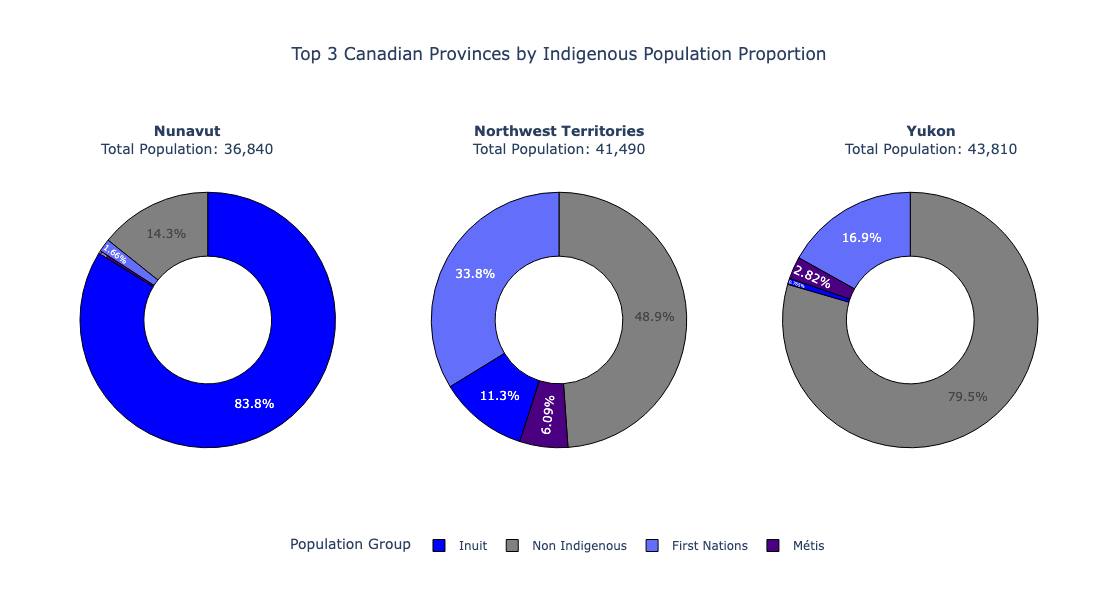

In [127]:
labels = ["First Nations", "Inuit", "Métis", "Non Indigenous"]
colors = ["volet", "blue", "indigo", "gray"]

p1 = top3.iloc[0]
p2 = top3.iloc[1]
p3 = top3.iloc[2]

fig = make_subplots(
    rows=1,
    cols=3,
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
    horizontal_spacing=0.1
)

fig.add_trace(
    go.Pie(
        labels=labels,
        values=[p1["First_Nations"], p1["Inuit"], p1["Métis"], p1["Non_Indigenous"]],
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="black", width=1)),
        textinfo="percent",
        textposition="inside",
        hovertemplate="<b>%{label}</b><br>Count: %{value:,}<extra></extra>",
        name=p1["Location"],
        showlegend=True
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=labels,
        values=[p2["First_Nations"], p2["Inuit"], p2["Métis"], p2["Non_Indigenous"]],
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="black", width=1)),
        textinfo="percent",
        textposition="inside",
        hovertemplate="<b>%{label}</b><br>Count: %{value:,}<extra></extra>",
        name=p2["Location"],
        showlegend=False
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=labels,
        values=[p3["First_Nations"], p3["Inuit"], p3["Métis"], p3["Non_Indigenous"]],
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="black", width=1)),
        textinfo="percent",
        textposition="inside",
        hovertemplate="<b>%{label}</b><br>Count: %{value:,}<extra></extra>",
        name=p3["Location"],
        showlegend=False
    ),
    row=1, col=3
)

fig.update_layout(
    annotations=[
        dict(
            text=f"<b>{p1['Location']}</b><br>Total Population: {int(p1['Total_Pop']):,}",
            x=0.02, y=1, xref="paper", yref="paper",
            showarrow=False, font=dict(size=14)
        ),
        dict(
            text=f"<b>{p2['Location']}</b><br>Total Population: {int(p2['Total_Pop']):,}",
            x=0.5, y=1, xref="paper", yref="paper",
            showarrow=False, font=dict(size=14)
        ),
        dict(
            text=f"<b>{p3['Location']}</b><br>Total Population: {int(p3['Total_Pop']):,}",
            x=0.98, y=1, xref="paper", yref="paper",
            showarrow=False, font=dict(size=14)
        ),
    ],
    title_text="Top 3 Canadian Provinces by Indigenous Population Proportion",
    title_x=0.5,
    height=600,
    width=900,
    legend=dict(
        title="Population Group",
        orientation="h",
        yanchor="bottom", y=-0.1,
        x=0.5, xanchor="center"
    ),
    margin=dict(t=120, b=80)
)

fig.write_image("subplots.png")
fig.write_html("subplots.html")
fig.show()

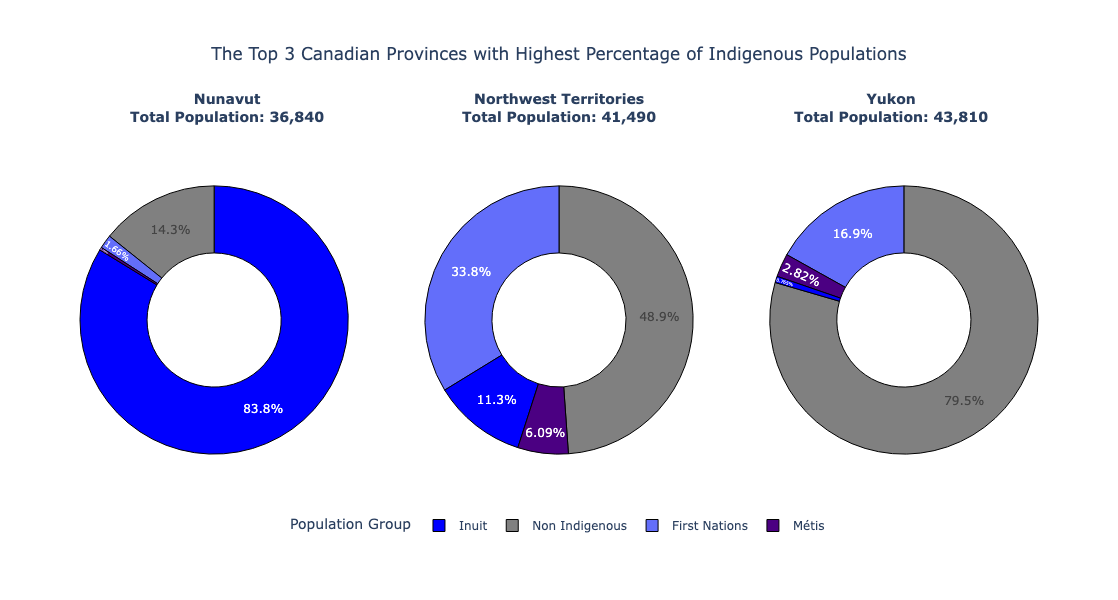

In [116]:
labels = ["First Nations", "Inuit", "Métis", "Non Indigenous"]
colors = ["volet", "blue", "indigo", "gray"]

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
                    horizontal_spacing=0.08)

# Add one Pie trace per subplot
for i, row in top3.iterrows():
    values = [
        int(row["First_Nations"]),
        int(row["Inuit"]),
        int(row["Métis"]),
        int(row["Non_Indigenous"])
    ]
    if i == 0:
        showlegend = True  
    else:
        showlegend = False

    fig.add_trace(
        go.Pie(
            labels=labels,
            values=values,
            hole=0.5,
            marker=dict(colors=colors, line=dict(color="black", width=1)),
            textinfo="percent",           # only the percentage labels as required
            textposition="inside",        # let Plotly place inside where possible
            hovertemplate="<b>%{label}</b><br>Count: %{value:,}<extra></extra>",
            showlegend=showlegend
        ),
        row=1, col=i+1
    )

# Annotations above each subplot: province name and total pop
# Compute nice text and center positions for three subplots
titles = []
for _, r in top3.iterrows():
    titles.append(f"{r['Location']}<br>Total Population: {int(r['Total_Pop']):,}")

# Approximate x positions for annotations (centered above each subplot)
# These numbers work well for a 3-panel row; adjust if you change width/spacing
x_positions = [0.05, 0.5, 0.95]

annotations = []
for x, text in zip(x_positions, titles):
    annotations.append(
        dict(
            text=f'<span style="font-weight:bold">{text}</span>',
            x=x,
            y=1.08,           
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=14),
            align="center"
        )
    )

fig.update_layout(
    annotations = annotations,
    title_text="The Top 3 Canadian Provinces with Highest Percentage of Indigenous Populations",
    title_x=0.5,
    height=600,
    width=900,
    legend=dict(title="Population Group", orientation="h", yanchor="bottom", y=-0.05, x=0.5, xanchor="center"),
    margin=dict(t=120, b=80)
)

fig.write_image("subplots.png")
fig.write_html("subplots.html")

fig.show()